# Planteamiento de hipótesis

Ahora que hemos utilizado la generación estructurada para elaborar un conjunto de datos, es momento de plantear nuestras hipótesis.


# Cargamos los datos

In [1]:
import pandas as pd
import numpy as np
from scipy.stats import chi2_contingency
import matplotlib.pyplot as plt
from pprint import pprint

In [2]:
ds = pd.read_csv('results.csv')
print(ds.shape)
ds.head()

(100, 7)


,nombre,sexo,edad,clase,nivel,prompt_id,prompt
0,Kael,masculino,28,guerrero,5,1,"Soy una persona fuerte, con mucho carisma y do..."
1,Kaelen,masculino,28,tanque,5,1,"Soy una persona fuerte, con mucho carisma y do..."
2,Kael,masculino,32,guerrero,5,1,"Soy una persona fuerte, con mucho carisma y do..."
3,Valerio,masculino,28,guerrero,5,1,"Soy una persona fuerte, con mucho carisma y do..."
4,Kael,masculino,26,guerrero,5,1,"Soy una persona fuerte, con mucho carisma y do..."


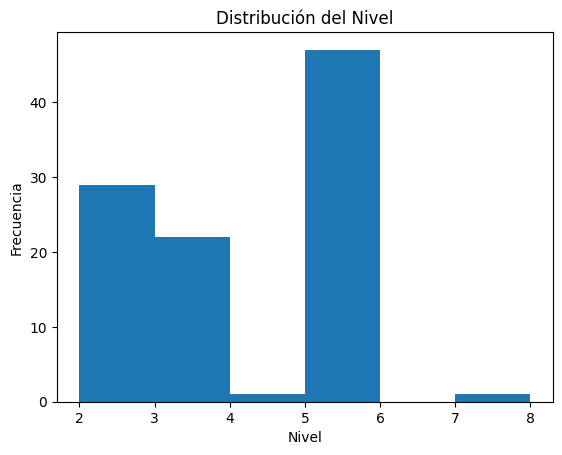

In [3]:
plt.hist(ds['nivel'], bins=np.arange(ds['nivel'].min(), ds['nivel'].max() + 1, 1))
plt.xlabel('Nivel')
plt.ylabel('Frecuencia')
plt.title('Distribución del Nivel')
plt.show()

# Ejemplo 1. El estímulo (prompt) se asocia con el sexo elegido

```
H0: sexo y estímulo son independientes. El modelo no tiene ningún sesgo.

H1: hay asociación (el sexo depende del estímulo). El modelo presenta un sesgo.
```

Para poder demostrar estas hipótesis realizaremos la prueba de chi-cuadrado sobre una tabla de contingencia y utilizaremos el coeficiente V de Cramer.

In [9]:
# 1) Tabla id-sexo
tab = pd.crosstab(ds['prompt_id'], ds['sexo']).sort_index()
print('Tabla contingencia id-sexo:\n', tab, '\n')

# 2) chi-cuadrado de independencia + Cramer V
chi2, p, dof, exp = chi2_contingency(tab)
N = tab.to_numpy().sum()
cramers_v = np.sqrt(chi2 / (N * (min(tab.shape) - 1)))
print(f'Chi-cuadrado={chi2:.3f}, gl={dof}, p={p:.4g}, Cramer V={cramers_v:.3f}')

Tabla contingencia id-sexo:
 sexo       femenino  masculino
prompt_id                     
1                 0         50
2                50          0 

Chi-cuadrado=96.040, gl=1, p=1.126e-22, Cramer V=0.980


**Conclusión**: Tras construir la tabla de contingencia (tipo de prompt y sexo) y realizar la prueba de chi-cuadrado, el valor del estadístico *p* nos permiten rechazar H0 (la hipótesis de independencia), ya que `p < 0.05`

# Ejemplo 2. Diferencias y similitudes entre los nombres

En estos experimentos, no se observa una correlación entre la base léxica de los nombres que el modelo ha seleccionado para las clases `Tanque, Guerreros` y los adjetivos que hay en el prompt. Esto es una clara ventaja del modelo respecto a Qwen 2.5, aunque debemos ser cautelosos ya qe hay una gran diferencia en la muestra.

In [5]:
filtered_ds = ds[(ds['prompt_id'] == 1)]
pprint(filtered_ds['prompt'][0])

('Soy una persona fuerte, con mucho carisma y dotes de liderazgo.Cuando '
 'enfrento un problema lo hago de frente, porque mi valor puede vencer '
 'cualquier cosa. En la lucha no tengo rival: jamás he conocido la derrota.')


In [6]:
filtered_ds = ds[(ds['clase'] != 'soporte')]
display(filtered_ds['nombre'].value_counts())

,count
nombre,
Kael,37
Valerio,2
Kaelen,1
Kai,1
Leo,1
Rhys,1
Caelum,1
Silas,1
Rylan,1


Tampoco se observa en la clase `Soporte`

In [7]:
filtered_ds = ds[(ds['prompt_id'] == 2)]
pprint(filtered_ds['prompt'][50])

('Soy una persona amigable. No destaco por mis habilidades físicas, pero sí '
 'por mi capacidad de entender a los demás. Me preocupo por mis compañeros y '
 'tengo una gran inteligencia emocional.')


In [8]:
filtered_ds = ds[(ds['clase'] == 'soporte')]
display(filtered_ds['nombre'].value_counts())

,count
nombre,
Luna,16
Lena,6
Sofia,3
Maya,3
Ava,2
Lyra,2
Lia,2
Liora,2
Clara,1
